In [ ]:
import os, signal, zipfile, random
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from google.colab import files

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
# Index for iterating over images
pic_index = 0

# Dataset

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-07-10 19:18:07--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.128, 142.251.18.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M  40.5MB/s    in 4.1s    

2023-07-10 19:18:11 (34.7 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]

--2023-07-10 19:18:11--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.128, 142.251.18.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148

In [ ]:
# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [ ]:
train_dir = os.path.join('./horse-or-human')
validation_dir = os.path.join('./validation-horse-or-human')

train_horse_dir = os.path.join(train_dir, 'horses')
train_human_dir = os.path.join(train_dir, 'humans')
validation_horse_dir = os.path.join(validation_dir, 'horses')
validation_human_dir = os.path.join(validation_dir, 'humans')

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
validation_horse_names = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

print(f'TRAIN SET HORSES: {train_horse_names[:5]}')
print(f'TRAIN SET HUMANS: {train_human_names[:5]}')
print(f'VAL SET HORSES: {validation_horse_names[:5]}')
print(f'VAL SET HUMANS: {validation_human_names[:5]}')
print()
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

TRAIN SET HORSES: ['horse14-9.png', 'horse15-7.png', 'horse29-1.png', 'horse42-3.png', 'horse07-9.png']
TRAIN SET HUMANS: ['human02-20.png', 'human03-29.png', 'human02-19.png', 'human04-08.png', 'human15-14.png']
VAL SET HORSES: ['horse3-498.png', 'horse5-100.png', 'horse5-065.png', 'horse3-255.png', 'horse3-198.png']
VAL SET HUMANS: ['valhuman02-14.png', 'valhuman03-24.png', 'valhuman05-18.png', 'valhuman03-10.png', 'valhuman03-05.png']

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


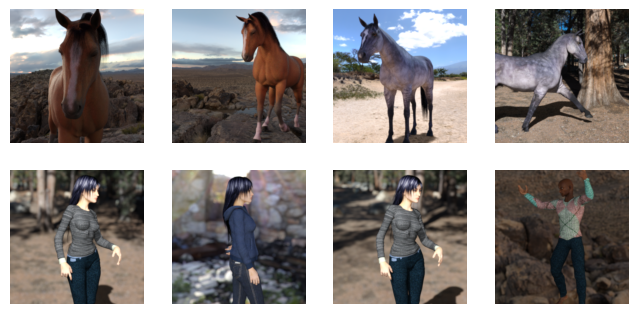

In [ ]:
# Set up matplotlib fig, and size it to fit 2x2 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)

pic_index += 4
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-4:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-4:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Preprocessing

In [ ]:
train_datagen =
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# Model

In [ ]:
model = tf.keras.models.Sequential([
    # 1st convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # 2nd convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 3rd convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 4th convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 5th convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # output neuron
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)      

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

# Training

In [ ]:
history = model.fit(
    train_generator,   # streams the images from the training dir
    steps_per_epoch=8, # number of batches for 1024 training images and batch size 128
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8, # 256 images, batch size 32
)

Epoch 1/15
8/8 [==============================] - 17s 1s/step - loss: 0.6962 - accuracy: 0.5751 - val_loss: 0.6779 - val_accuracy: 0.8867
Epoch 2/15
8/8 [==============================] - 10s 1s/step - loss: 1.4367 - accuracy: 0.5840 - val_loss: 0.6605 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.6228 - accuracy: 0.6963 - val_loss: 0.6372 - val_accuracy: 0.5586
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 0.6881 - accuracy: 0.6808 - val_loss: 0.4877 - val_accuracy: 0.7656
Epoch 5/15
8/8 [==============================] - 12s 1s/step - loss: 0.4735 - accuracy: 0.8254 - val_loss: 0.6174 - val_accuracy: 0.6367
Epoch 6/15
8/8 [==============================] - 10s 1s/step - loss: 0.6330 - accuracy: 0.6652 - val_loss: 0.4919 - val_accuracy: 0.7852
Epoch 7/15
8/8 [==============================] - 12s 2s/step - loss: 0.7617 - accuracy: 0.8554 - val_loss: 0.5076 - val_accuracy: 0.8203
Epoch 8/15
8/8 [====================

# Prediction

In [ ]:
# predict with uploaded file(s)
uploaded = files.upload()

for fn in uploaded.keys():
  path = os.path.join('../content', fn)
  img = tf.keras.preprocessing.image.load_img(path, target_size=(300, 300))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is human")
  else:
    print(fn + " is horse")

Saving horse-arabs-stallion-ride-53114.jpeg to horse-arabs-stallion-ride-53114 (1).jpeg
1/1 [==============================] - 0s 293ms/step
[0.]
horse-arabs-stallion-ride-53114.jpeg is horse


# Visualize intermediate representations



1/1 [==============================] - 0s 104ms/step


<ipython-input-19-3471ec103514>:40: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


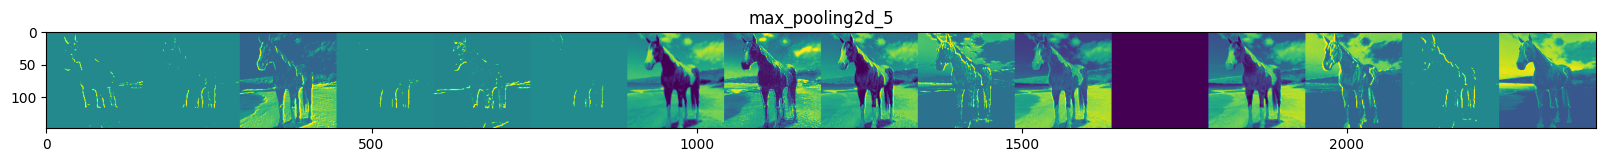

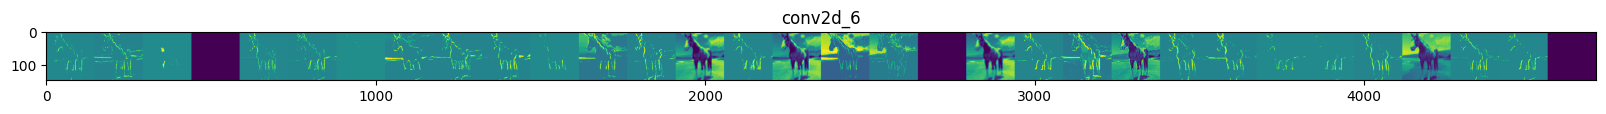

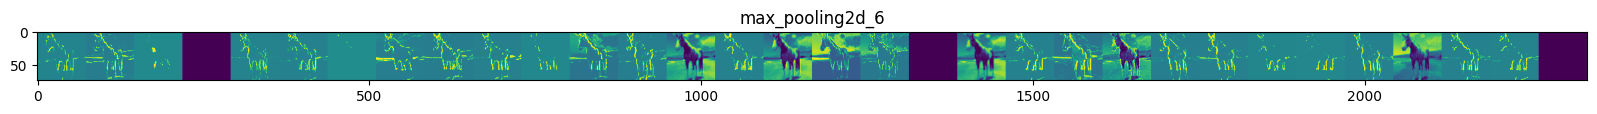

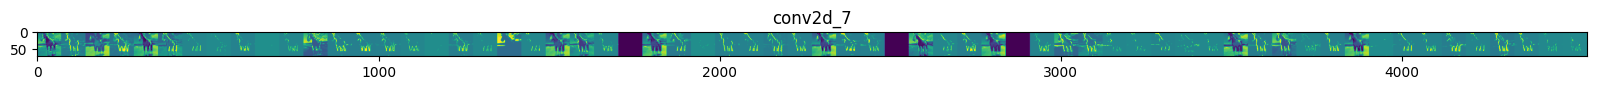

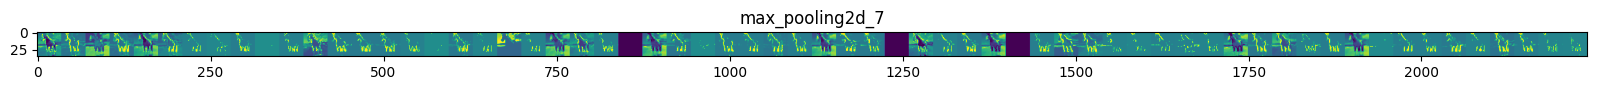

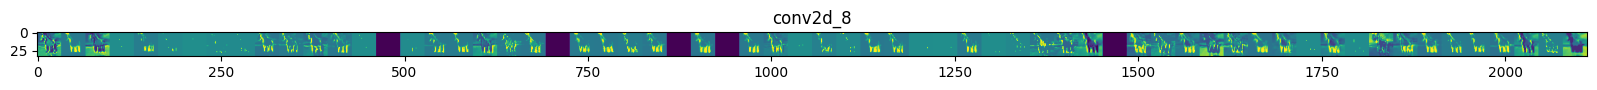

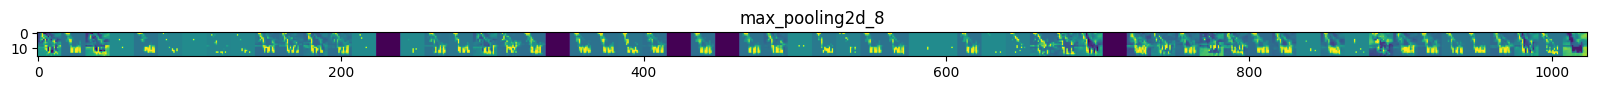

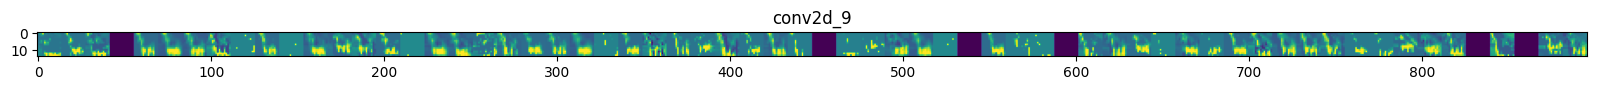

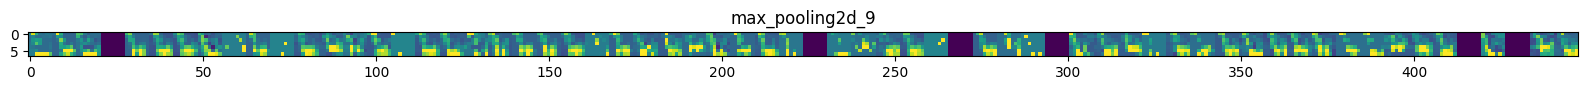

In [ ]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Clean up

In [ ]:
# os.kill(os.getpid(), signal.SIGKILL)